### LSE Data Analytics Online Career Accelerator

### Data Analytics using Python

## 1) Scenario

In [234]:
# Optimizing Network Capacity and Resource Utilization

In [ ]:
# Service Utilization

In [ ]:
# Missed Appointments

In [ ]:
# External Data Usage.

In [ ]:
# Matching Population Growth.

In [ ]:
# Leveraging Existing Infrastructure.

In [ ]:
# Staffing and Network Capacity.


In [ ]:
# Resource Utilization Analysis.

### Prepare your workstation

In [235]:
# Import the necessary libraries.
import pandas as pd
import numpy as np

# Import other libraries if required. (Note that you can revisit this section in later modules.)

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import *

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [315]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

ad

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


In [316]:
# View the DataFrame.

ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [238]:
# Check for missing values.
# missing values
# nan in 8 columns

ad_na = ad[ad.isna().any(axis=1)]

ad_na.shape

(0, 8)

In [239]:
# Review metadata and descriptive statistics.

print(ad.info())

# Review descriptive statistics

print(ad.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None
       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


In [317]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [241]:
# View the DataFrame.

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [242]:
# Check for missing values.

ar_na = ar[ar.isna().any(axis=1)]

ar_na.shape

(0, 7)

In [243]:
# Review metadata and descriptive statistics.

print(ar.info())

# Review descriptive statistics
print(ar.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.0000

In [244]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [245]:
# View the DataFrame.

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [246]:
# Check for missing values.

nc_na = nc[nc.isna().any(axis=1)]

nc_na.shape

(0, 8)

In [247]:
# Review metadata and descriptive statistics.

print(nc.info())
print(nc.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB
None
                    appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:0

In [383]:
# Import and sense-check 'NHS Workforce Statistics, October 2020 medical staff.csv as med.
# Datframe imported from lords library
med = pd.read_csv('NHS Workforce Statistics, October 2020 medical staff.csv')

med

,Date,NHSE_Region_Code,NHSE_Region_Name,Org code,Org name,Grade Sort Order,Grade,Specialty Group,Specialty,Total FTE
0,2020-10-31,Y56,London,RJ1,Guy's and St Thomas' NHS Foundation Trust,1,Consultant,Surgical group,Paediatric surgery,6.350
1,2020-10-31,Y56,London,RJ1,Guy's and St Thomas' NHS Foundation Trust,2,Associate Specialist,General medicine group,Genito-urinary medicine,0.800
2,2020-10-31,Y56,London,RJ2,Lewisham and Greenwich NHS Trust,6,Core Training,Obstetrics & gynaecology,Community Sexual and Reproductive Health,2.000
3,2020-10-31,Y56,London,RJ2,Lewisham and Greenwich NHS Trust,6,Core Training,Surgical group,Trauma and orthopaedic surgery,8.000
4,2020-10-31,Y56,London,RJ2,Lewisham and Greenwich NHS Trust,6,Core Training,Surgical group,Urology,1.000
...,...,...,...,...,...,...,...,...,...,...
18625,2020-10-31,Y59,South East,RWF,Maidstone and Tunbridge Wells NHS Trust,8,Foundation Doctor Year 1,Surgical group,General surgery,17.000
18626,2020-10-31,Y59,South East,RWX,Berkshire Healthcare NHS Foundation Trust,1,Consultant,General medicine group,Genito-urinary medicine,2.125
18627,2020-10-31,Y59,South East,RWX,Berkshire Healthcare NHS Foundation Trust,3,Specialty Doctor,Psychiatry group,General psychiatry,16.500
18628,2020-10-31,Y59,South East,RWX,Berkshire Healthcare NHS Foundation Trust,3,Specialty Doctor,Psychiatry group,Old age psychiatry,1.800


In [384]:
# Check the data

print(med.info())
print(med.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18630 entries, 0 to 18629
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              18630 non-null  object 
 1   NHSE_Region_Code  18630 non-null  object 
 2   NHSE_Region_Name  18630 non-null  object 
 3   Org code          18630 non-null  object 
 4   Org name          18630 non-null  object 
 5   Grade Sort Order  18630 non-null  int64  
 6   Grade             18630 non-null  object 
 7   Specialty Group   18630 non-null  object 
 8   Specialty         18630 non-null  object 
 9   Total FTE         18630 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB
None
       Grade Sort Order     Total FTE
count      18630.000000  18630.000000
mean           4.340311      6.598586
std            2.567741     10.387576
min            1.000000      0.010000
25%            2.000000      1.000000
50%            5.000000      3.0

In [ ]:
# Convert date from object to datetime
med['Date'] = pd.to_datetime(med['Date'])

print(med.info())

In [ ]:
# Convert relevant columns to object (string) type
object_columns = ['NHSE_Region_Code', 'NHSE_Region_Name', 'Org code', 'Org name', 'Grade', 'Specialty Group', 'Specialty']
med[object_columns] = med[object_columns].astype(str)

# Convert 'Grade Sort Order' column to int64
med['Grade Sort Order'] = med['Grade Sort Order'].astype(int)

# Convert 'Total FTE' column to float64
med['Total FTE'] = med['Total FTE'].astype(float)

# Verify the conversion
print(med.info())

### Exploration suggestions:
Make sure to supplement the list with additional questions and observations that you have identified during modules 1 and 2.

**Question 1:** How many locations are there in the data set?

In [248]:
# Determine the number of locations.

num_locations = nc['sub_icb_location_name'].nunique()

# Print the result
print("Number of unique locations:", num_locations)

Number of unique locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [249]:
# Determine the top five locations based on record count.

top_locations = ad['sub_icb_location_name'].value_counts().nlargest(5)

print("Five locations with the highest number of appointments:")
print(top_locations)

Five locations with the highest number of appointments:
sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: count, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [250]:
# Determine the number of service settings.

print(len(nc['service_setting'].unique()))

5


In [251]:
# Determine the number of context types.

print(len(nc['context_type'].unique()))

3


In [252]:
# Determine the number of national categories.

print(len(nc['national_category'].unique()))

18


In [253]:
# Determine the number of appointment statuses.

print(len(ar['appointment_status'].unique()))

3


In [ ]:
# Data Cleaning

In [318]:
# Create a copy of the dataset.

ad_clean=ad.copy()

ad_clean.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [319]:
# This function gives the boolean value for dataset if any nulls exist.

ad_clean.isnull()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
137788,False,False,False,False,False,False,False,False
137789,False,False,False,False,False,False,False,False
137790,False,False,False,False,False,False,False,False
137791,False,False,False,False,False,False,False,False


In [333]:
#This function provides the boolean value to see if there is any null values in the columns dataset.

ad_clean.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

In [334]:
# This function also provides bool values for duplicate values in the dataset.
# There is no duplicate values in the dataset.

ad_clean.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
137788    False
137789    False
137790    False
137791    False
137792    False
Length: 137793, dtype: bool

In [ ]:
# If a dataset contains duplicate values, it can be removed using the following syntax.

ad_clean.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
# Create a copy of the dataset.

ar_clean = ar.copy()

ar_clean

In [ ]:
# This function gives the boolean value for dataset if any nulls exist.

ar_clean.isnull()

In [ ]:
# sum of the null values

ar_clean.isna().sum()

In [ ]:
# This function also provides bool values for duplicate values in the dataset.
# We can see some duplicates in this dataset, based on the previous functions I assume they are false.

ar_clean.duplicated()

In [ ]:
# If a dataset contains duplicate values, it can be removed using the following syntax.
# Thid funtion dropped 21,604 values but won't be used as it's false duplicates based on the boolean funtions.

ar_clean.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [ ]:
# Create a copy of the dataset.

nc_clean=ad.copy()

nc_clean

In [ ]:
# This function gives the boolean value for dataset if any nulls exist.

nc_clean.isnull()

In [ ]:
# sum of the null values

nc_clean.isna().sum()

In [ ]:
# This function also provides bool values for duplicate values in the dataset.
# There is no duplicated values

nc_clean.duplicated()

In [ ]:
# If a dataset contains duplicate values, it can be removed using the following syntax.
# No dupllicated values dropped.

nc_clean.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 3) Assignment activity 3
Continue your exploratory data analysis by answering the specific questions posed by the NHS as well as additional trends identified during data exploration. You can start by looking at the date range and the change in behaviour over time for the available data sources.

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [254]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.

print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [255]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

print(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [332]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%m-%dy')

# View the DataFrame.

print("ad =", ad) 
print("DataFrame Info:")
print(ad.dtypes)  

# Display data types of each column
print("\nDataFrame Head:")
ad.head()

ad =        sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and Nor

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [257]:
print(ad['appointment_date'].head())

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]


In [328]:
# Change the format of ar['appointment_date'] to datetime.

ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DataFrame.
print(ar['appointment_month'].head())

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: appointment_month, dtype: datetime64[ns]


In [259]:
print(nc['appointment_date'].head())

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [260]:
# Determine the minimum and maximum dates in the ad DataFrame.
ad_min_date = ad['appointment_date'].min()
ad_max_date = ad['appointment_date'].max()

# Use appropriate docstrings.

print("Minimum date:", ad_min_date)
print("Maximum date:", ad_max_date)

Minimum date: 2021-12-01 00:00:00
Maximum date: 2022-06-30 00:00:00


In [261]:
# Determine the minimum and maximum dates in the nc DataFrame.
nc_min_date = nc['appointment_date'].min()
nc_max_date = nc['appointment_date'].max()
# Use appropriate docstrings.

print("Minimum_date", nc_min_date)
print("Maximum date", nc_max_date)

Minimum_date 2021-08-01 00:00:00
Maximum date 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [326]:

# Filter data for the period (2022-01-01 to 2022-06-01)
filtered_nc = nc[(nc['appointment_date'] >= '2022-01-01') & (nc['appointment_date'] < '2022-06-01')]

# Group by service setting, count appointments, and sort (most popular first)
service_setting_counts = (
    filtered_nc.groupby('sub_icb_location_name')['appointment_date']
    .count()
    .reset_index()
    .sort_values(by='appointment_date', ascending=False)
)

# Get the most popular service setting
most_popular_service = service_setting_counts.iloc[0]['sub_icb_location_name']

# Print results
print("Most popular service setting (2022-01-01 to 2022-06-01):", most_popular_service)
print("\nDetails for all service settings (sorted by count):")
service_setting_counts.head()

Most popular service setting (2022-01-01 to 2022-06-01): NHS North West London ICB - W2U3Z

Details for all service settings (sorted by count):


,sub_icb_location_name,appointment_date
76,NHS North West London ICB - W2U3Z,5889
21,NHS Devon ICB - 15N,5735
47,NHS Kent and Medway ICB - 91Q,5713
36,NHS Hampshire and Isle Of Wight ICB - D9Y0V,5480
67,NHS North East London ICB - A3A8R,5410


**Question 3:** Which month had the highest number of appointments?

In [353]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

nc['count_of_appoints'] = nc.groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])['appointment_date'].transform('count')

# Then, sort the DataFrame based on the count_of_appoints column
nc_sorted = nc.sort_values(by='count_of_appoints', ascending=False)

# Display the sorted DataFrame
nc_sorted

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,count_of_appoints
97618,2022-03-16,E54000008,NHS Cheshire and Merseyside ICB - 01V,Extended Access Provision,Care Related Encounter,Clinical Triage,3,2022-03,82822
511754,2022-03-17,E54000037,NHS Devon ICB - 15N,General Practice,Care Related Encounter,Patient contact during Care Home Round,90,2022-03,82822
511745,2022-03-17,E54000037,NHS Devon ICB - 15N,General Practice,Inconsistent Mapping,Inconsistent Mapping,2582,2022-03,82822
511746,2022-03-17,E54000037,NHS Devon ICB - 15N,General Practice,Care Related Encounter,Walk-in,96,2022-03,82822
511747,2022-03-17,E54000037,NHS Devon ICB - 15N,Other,Care Related Encounter,General Consultation Acute,85,2022-03,82822
...,...,...,...,...,...,...,...,...,...
621805,2021-08-16,E54000059,NHS Northamptonshire ICB - 78H,Other,Care Related Encounter,Service provided by organisation external to the practice,2,2021-08,69999
621804,2021-08-16,E54000059,NHS Northamptonshire ICB - 78H,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,44,2021-08,69999
621803,2021-08-16,E54000059,NHS Northamptonshire ICB - 78H,General Practice,Care Related Encounter,Planned Clinics,1012,2021-08,69999
621802,2021-08-16,E54000059,NHS Northamptonshire ICB - 78H,Extended Access Provision,Inconsistent Mapping,Inconsistent Mapping,13,2021-08,69999


**Question 4:** What was the total number of records per month?

In [354]:
# Total number of records per month.

records_per_month = nc.groupby('count_of_appointments')['appointment_month'].sum()

# Print the result
records_per_month.head()


count_of_appointments
1    2021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-08...
2    2021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-08...
3    2021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-08...
4    2021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-092021-092021-09...
5    2021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-082021-092021-092021-092021-092021-0

In [324]:
records_per_month = nc.groupby('appointment_month').size()

# Print the result

records_per_month.head()

appointment_month
2021-08    69999
2021-09    74922
2021-10    74078
2021-11    77652
2021-12    72651
dtype: int64

In [265]:
# Your additional questions and insights.

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 4) Assignment activity 4
Use visual techniques to explore and communicate patterns in the data. Note that you will likely revisit this section when preparing the final visualisations to be used in your technical report and business presentation. Make sure to document your thoughts and observations as they relate to various potential stakeholders.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [266]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [267]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
count_of_appoints                 int64
dtype: object


In [329]:
# Aggregate on a monthly level and determine the sum of records per month.
# Convert 'appointment_date' to datetime
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Extract year and month to create a 'month' column
nc['appointment_month'] = nc['appointment_date'].dt.to_period('M')

# Group by 'appointment_month' and sum 'count_of_appointments'
monthly_aggregated = nc.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

# Convert 'appointment_month' back to datetime for consistency (optional)
monthly_aggregated['appointment_month'] = monthly_aggregated['appointment_month'].dt.to_timestamp()

# View the output.
monthly_aggregated.head()


,appointment_month,count_of_appointments
0,2021-08-01,23852171
1,2021-09-01,28522501
2,2021-10-01,30303834
3,2021-11-01,30405070
4,2021-12-01,25140776


**Service settings:**

In [331]:
#Create a new DataFrame (e.g. nc_ss).
#Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
#Calculate the total number of appointments

nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate appointments per month and service setting
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the new DataFrame
nc_ss.head()

,appointment_month,service_setting,count_of_appointments
0,2021-08,Extended Access Provision,160927
1,2021-08,General Practice,21575852
2,2021-08,Other,449101
3,2021-08,Primary Care Network,432448
4,2021-08,Unmapped,1233843


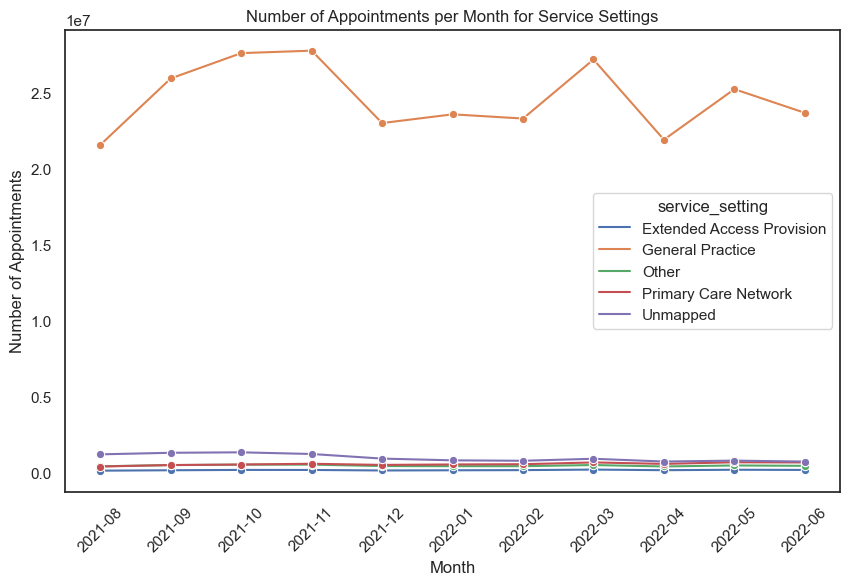

In [270]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, ci=None, marker='o')

# Set title and labels
plt.title("Number of Appointments per Month for Service Settings")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

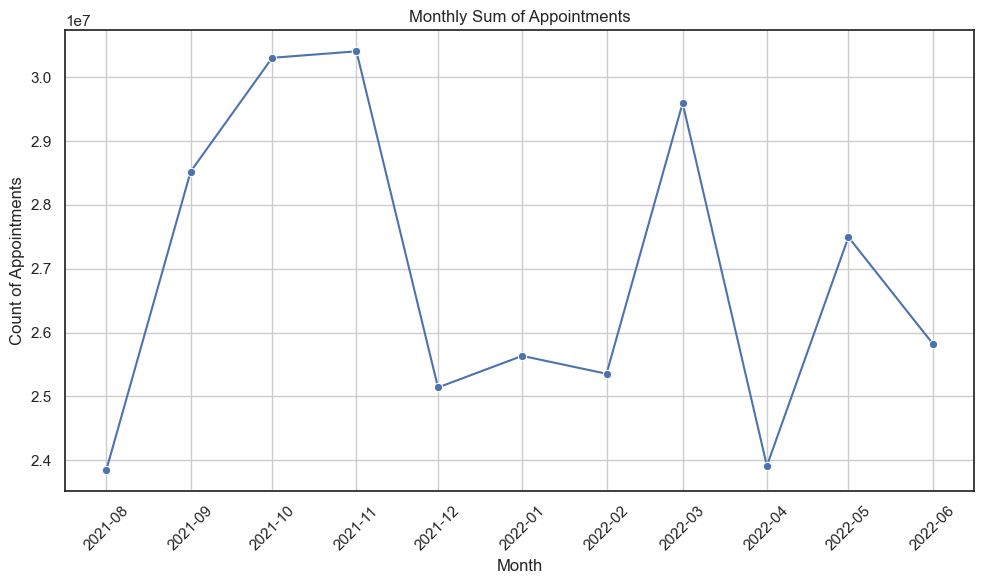

In [271]:
# Plot the appointments over the available date range, and review the service settings for months.


plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_aggregated, x='appointment_month', y='count_of_appointments', marker='o')

plt.title('Monthly Sum of Appointments')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()



# Create a lineplot.
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

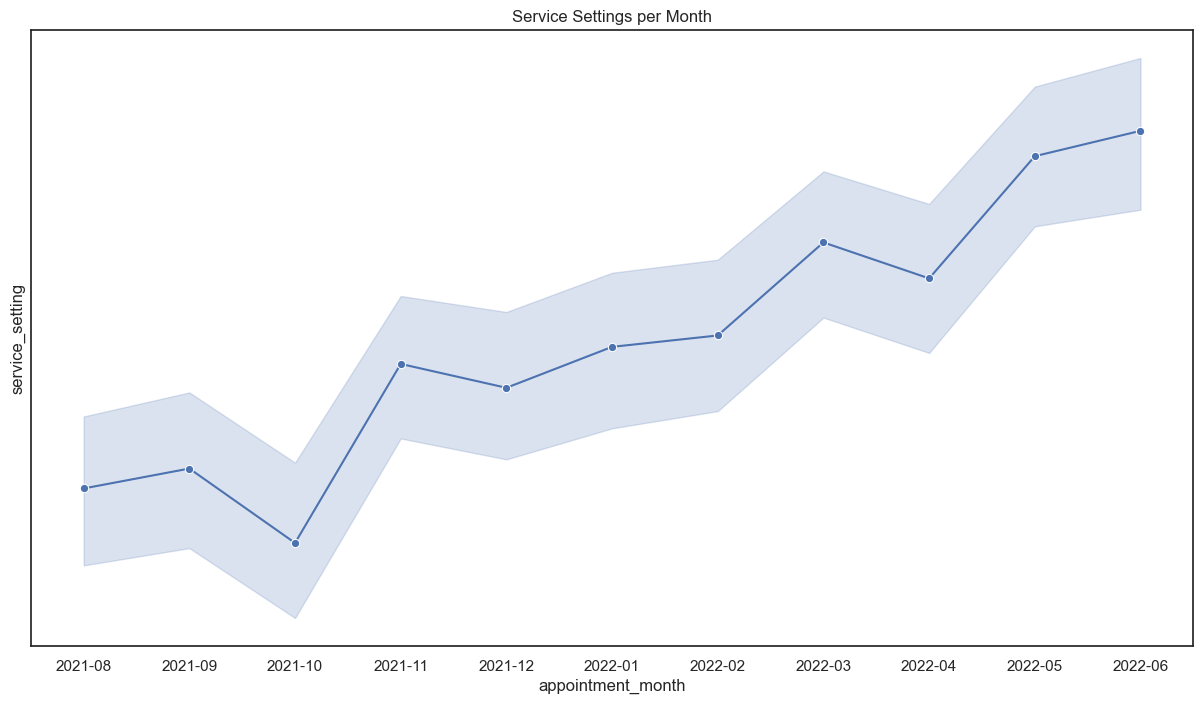

In [272]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the data using seaborn
sns.lineplot(x='appointment_month', y='service_setting', data=nc, marker='o', ax=ax)
ax.set_title("Service Settings per Month")


# Show the plot
plt.show


**Context types:**

In [273]:
# Create a separate data set that can be used in future weeks. 
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate appointments per month and service setting
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the new DataFrame
print(nc_ct.head())

# View the output.


  appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135


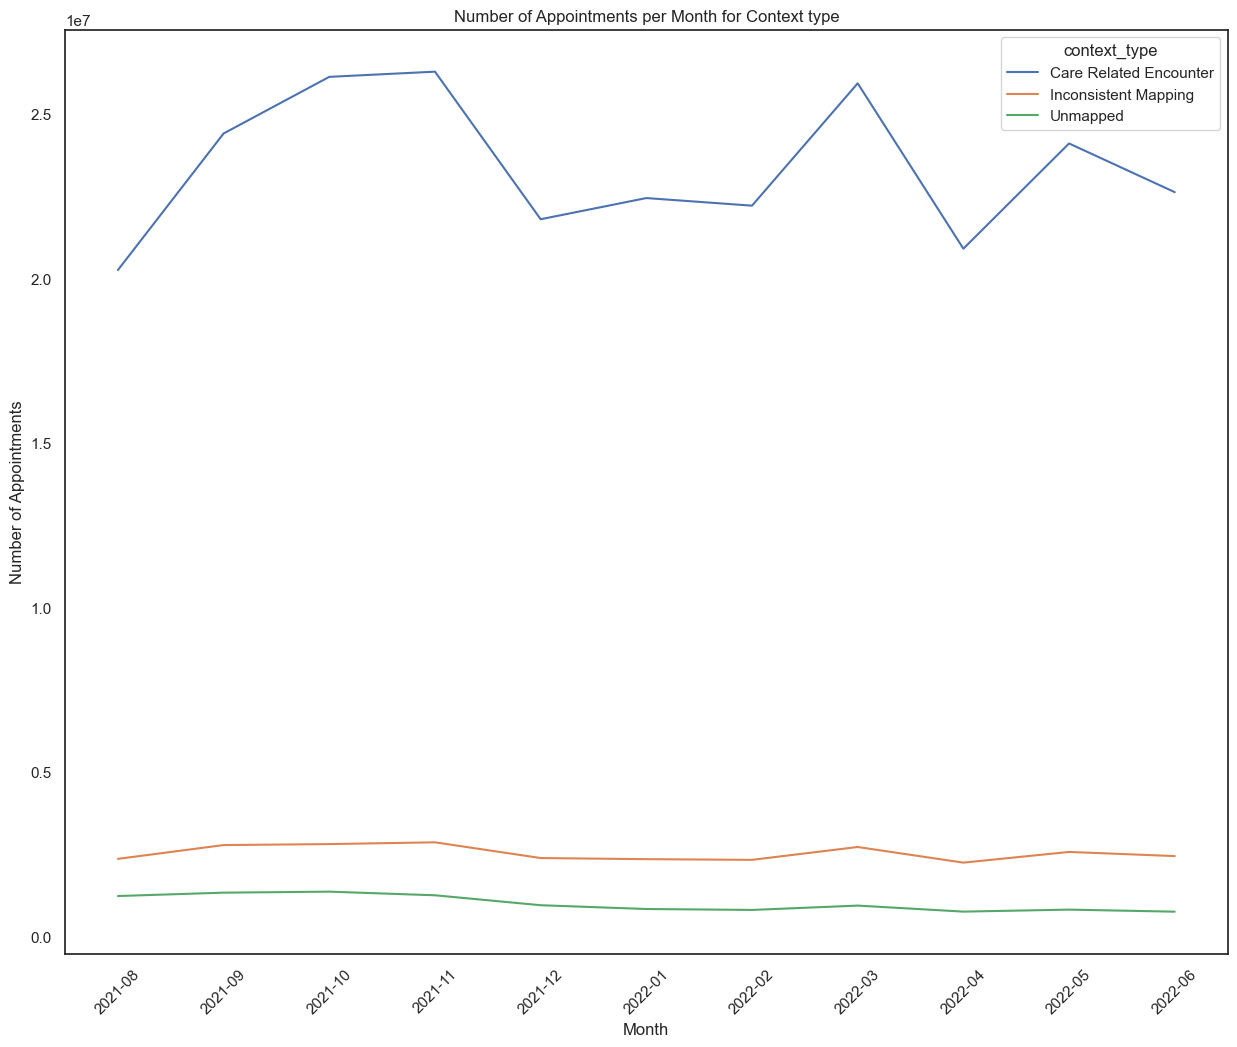

In [381]:
# Plot the appointments over the available date range, and review the context types for months.
plt.figure(figsize=(15, 12))

# Create a lineplot.

sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             data=nc_ct,
             hue ='context_type', ci=None)
# Set title and labels
plt.title("Number of Appointments per Month for Context type")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")

#rotate axis
plt.xticks(rotation=45)

plt.show()


**National categories:**

In [275]:
# Create a separate data set that can be used in future weeks. 
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate appointments per month and service setting
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

print(nc_nc.head())


  appointment_month  \
0           2021-08   
1           2021-08   
2           2021-08   
3           2021-08   
4           2021-08   

                                                     national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                      Care Home Visit   
2                                                      Clinical Triage   
3                                           General Consultation Acute   
4                                         General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045  


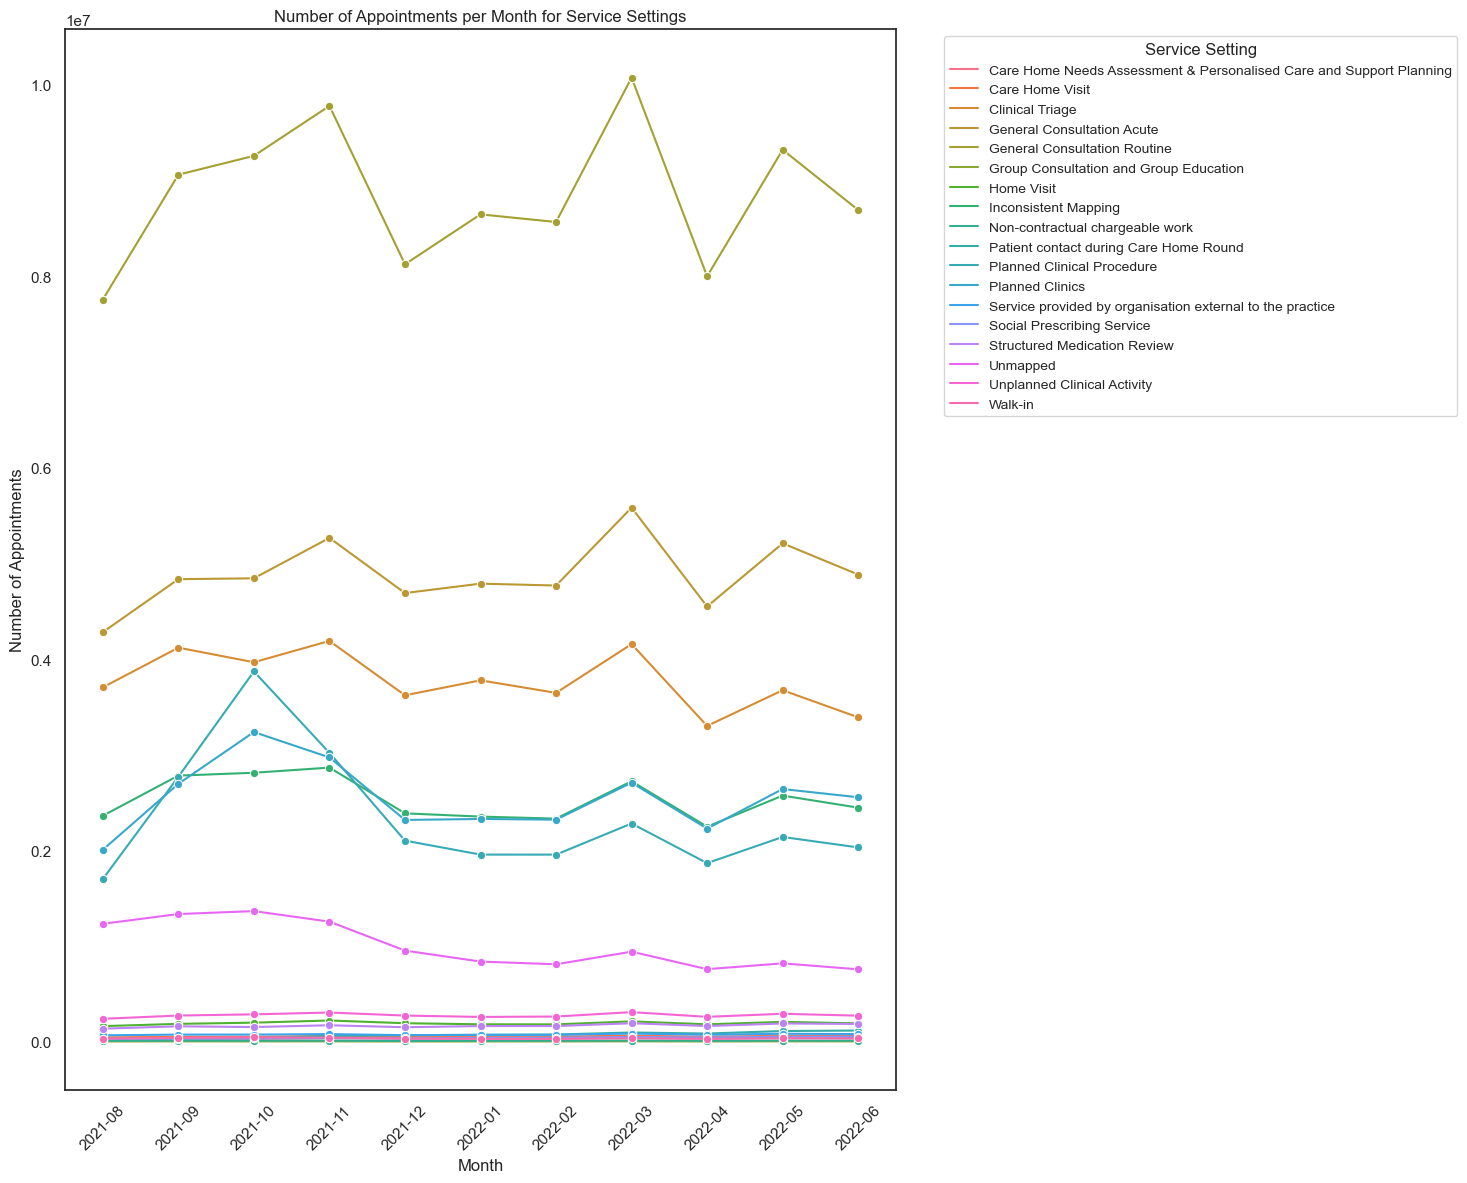

In [276]:
# Plot the appointments over the available date range, and review the national categories for months.
plt.figure(figsize=(15, 12))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, ci=None, marker='o')

# Set title and labels
plt.title("Number of Appointments per Month for Service Settings")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

#Moved the legend to the righy and reduced the fontsize
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='medium')


# Create a lineplot.
plt.tight_layout()
plt.show()



### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

**Summer:**


In [277]:
# Create a separate data set that can be used in future weeks. 

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])


nc_ss_summer = nc[(nc['appointment_date'] >= '2021-06-01') & 
                  (nc['appointment_date'] <= '2021-08-31')].reset_index()

print(nc_ss_summer.head())

   index appointment_date icb_ons_code  \
0      0       2021-08-02    E54000050   
1      1       2021-08-02    E54000050   
2      2       2021-08-02    E54000050   
3      3       2021-08-02    E54000050   
4      4       2021-08-02    E54000050   

                        sub_icb_location_name       service_setting  \
0  NHS North East and North Cumbria ICB - 00L  Primary Care Network   
1  NHS North East and North Cumbria ICB - 00L                 Other   
2  NHS North East and North Cumbria ICB - 00L      General Practice   
3  NHS North East and North Cumbria ICB - 00L      General Practice   
4  NHS North East and North Cumbria ICB - 00L      General Practice   

             context_type                       national_category  \
0  Care Related Encounter  Patient contact during Care Home Round   
1  Care Related Encounter                         Planned Clinics   
2  Care Related Encounter                              Home Visit   
3  Care Related Encounter              Gener

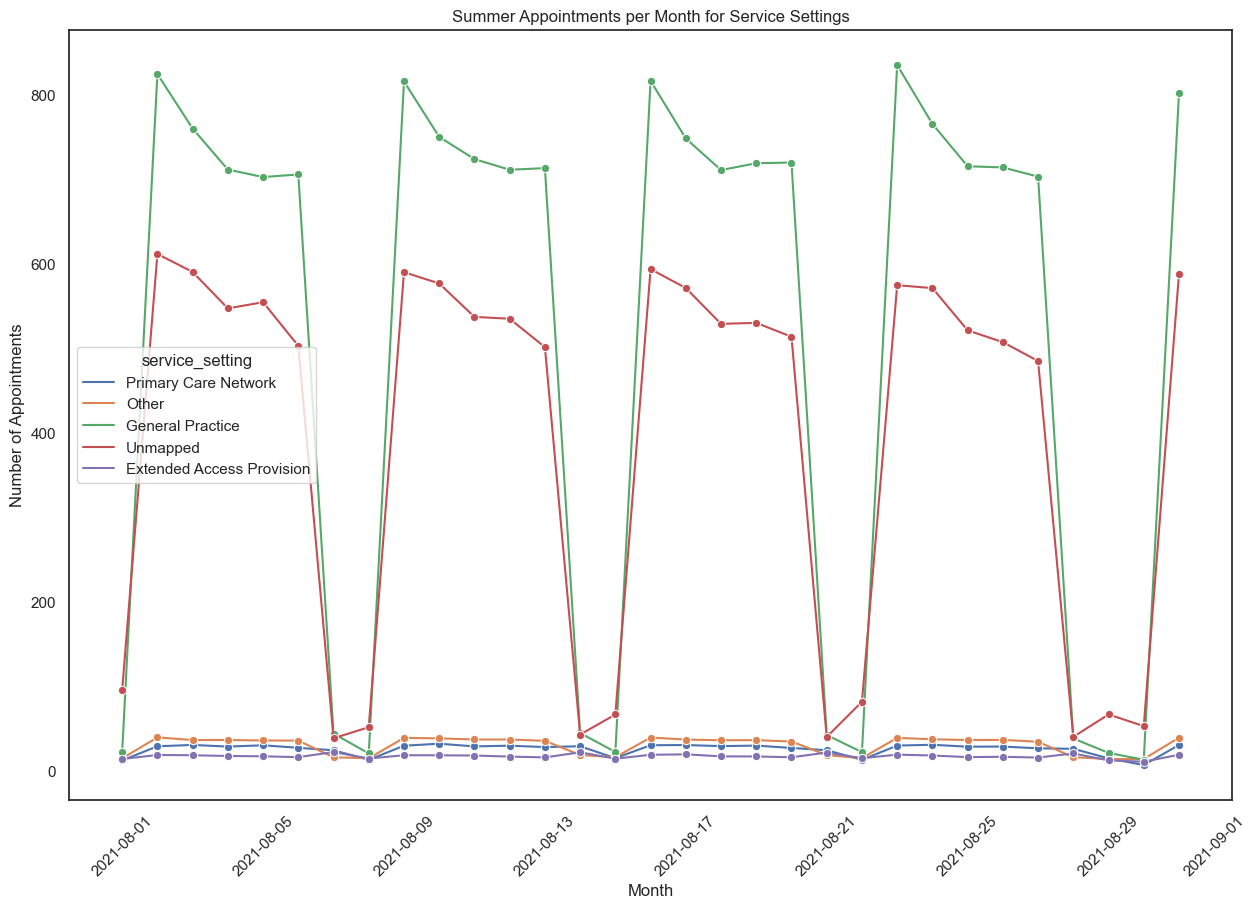

In [278]:
#Create a lineplot
plt.figure(figsize=(15, 10))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_summer, ci=None, marker='o')

# Set title and labels
plt.title("Summer Appointments per Month for Service Settings")
plt.xlabel("Month")
plt.ylabel("Number of Appointments")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Autumn:**

In [335]:
# Create a separate data set that can be used in future weeks. 

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])


nc_ss_autumn = nc[(nc['appointment_date'] >= '2021-09-01') & 
                  (nc['appointment_date'] <= '2021-11-30')].reset_index()

nc_ss_autumn.head()

,index,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,count_of_appoints
0,636,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,147,2021-09,74922
1,637,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,4,2021-09,74922
2,638,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,45,2021-09,74922
3,639,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,8,2021-09,74922
4,640,2021-09-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,1,2021-09,74922


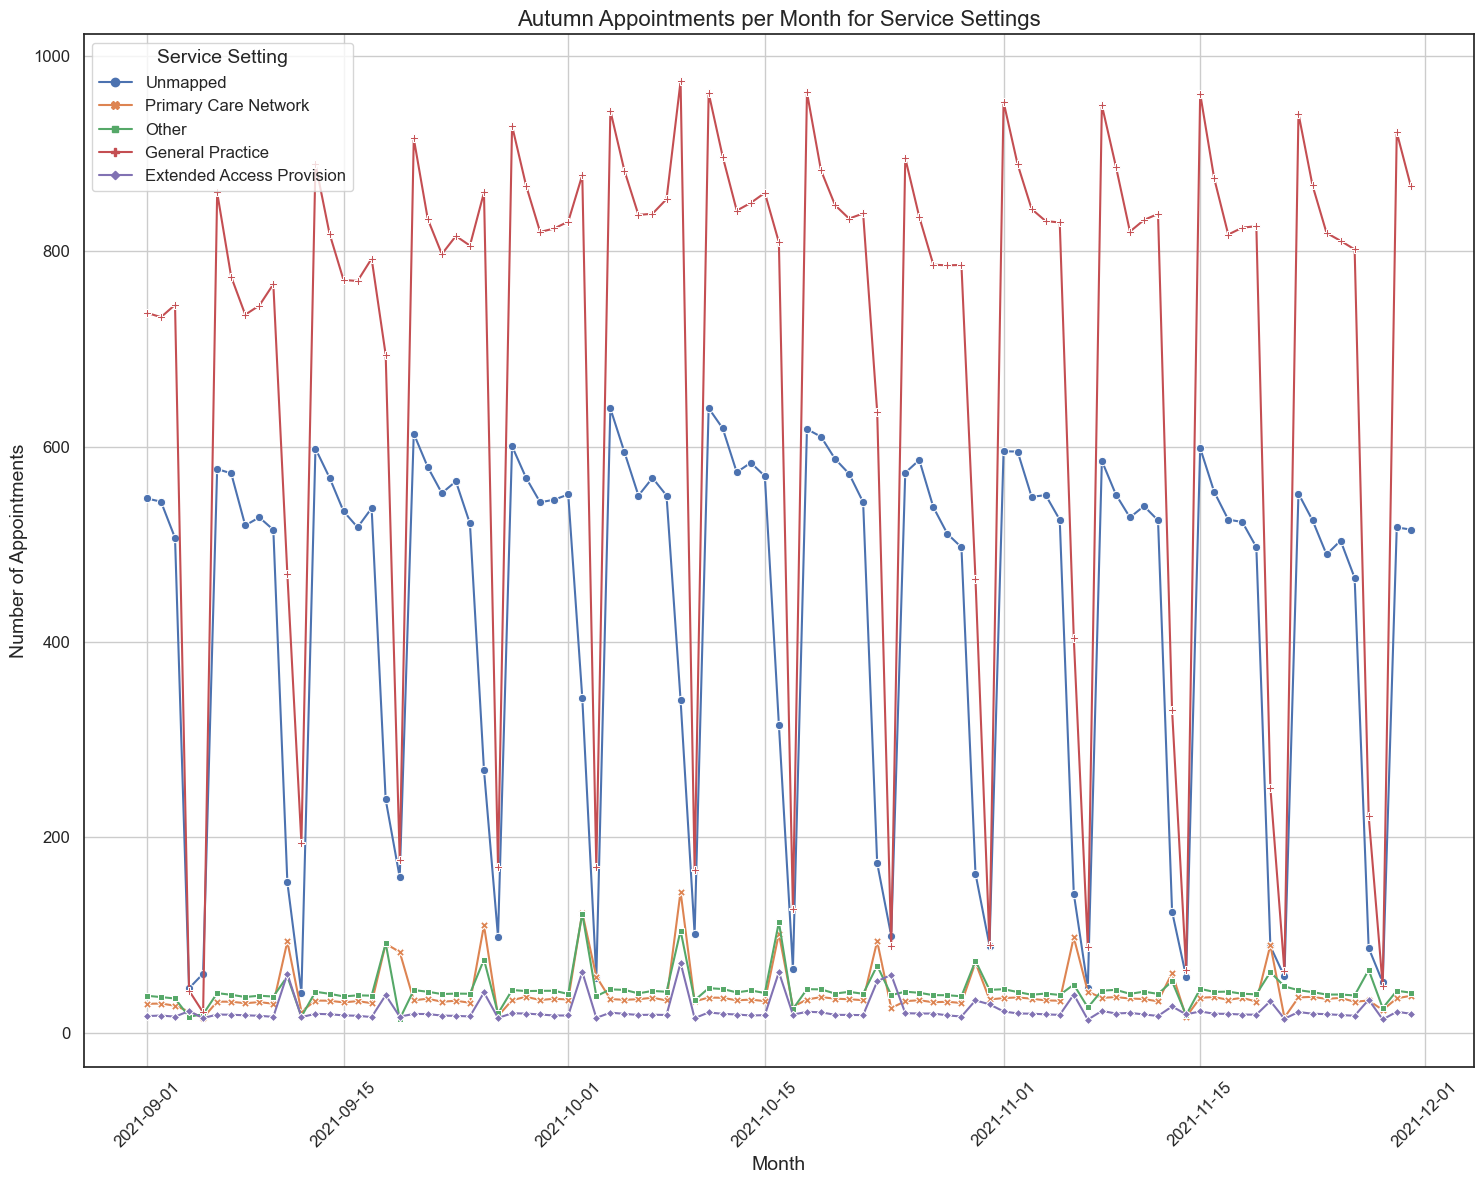

In [280]:
# Visualise the subset using a lineplot.

plt.figure(figsize=(15, 12))

# Create the line plot
sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    data=nc_ss_autumn, 
    ci=None, 
    marker='o', 
    style='service_setting',
    markers=True,
    dashes=False)

# Set title and labels
plt.title("Autumn Appointments per Month for Service Settings", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Appointments", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set y-axis labels font size
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Add a legend title
plt.legend(title='Service Setting', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Winter:**

In [336]:
# Create a separate data set that can be used in future weeks. 
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])


nc_ss_winter = nc[(nc['appointment_date'] >= '2021-12-01') & 
                  (nc['appointment_date'] <= '2022-02-28')].reset_index()

# View the output.

nc_ss_winter.head()



,index,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,count_of_appoints
0,2634,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,198,2021-12,72651
1,2635,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,5,2021-12,72651
2,2636,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,52,2021-12,72651
3,2637,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinical Procedure,27,2021-12,72651
4,2638,2021-12-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,30,2021-12,72651


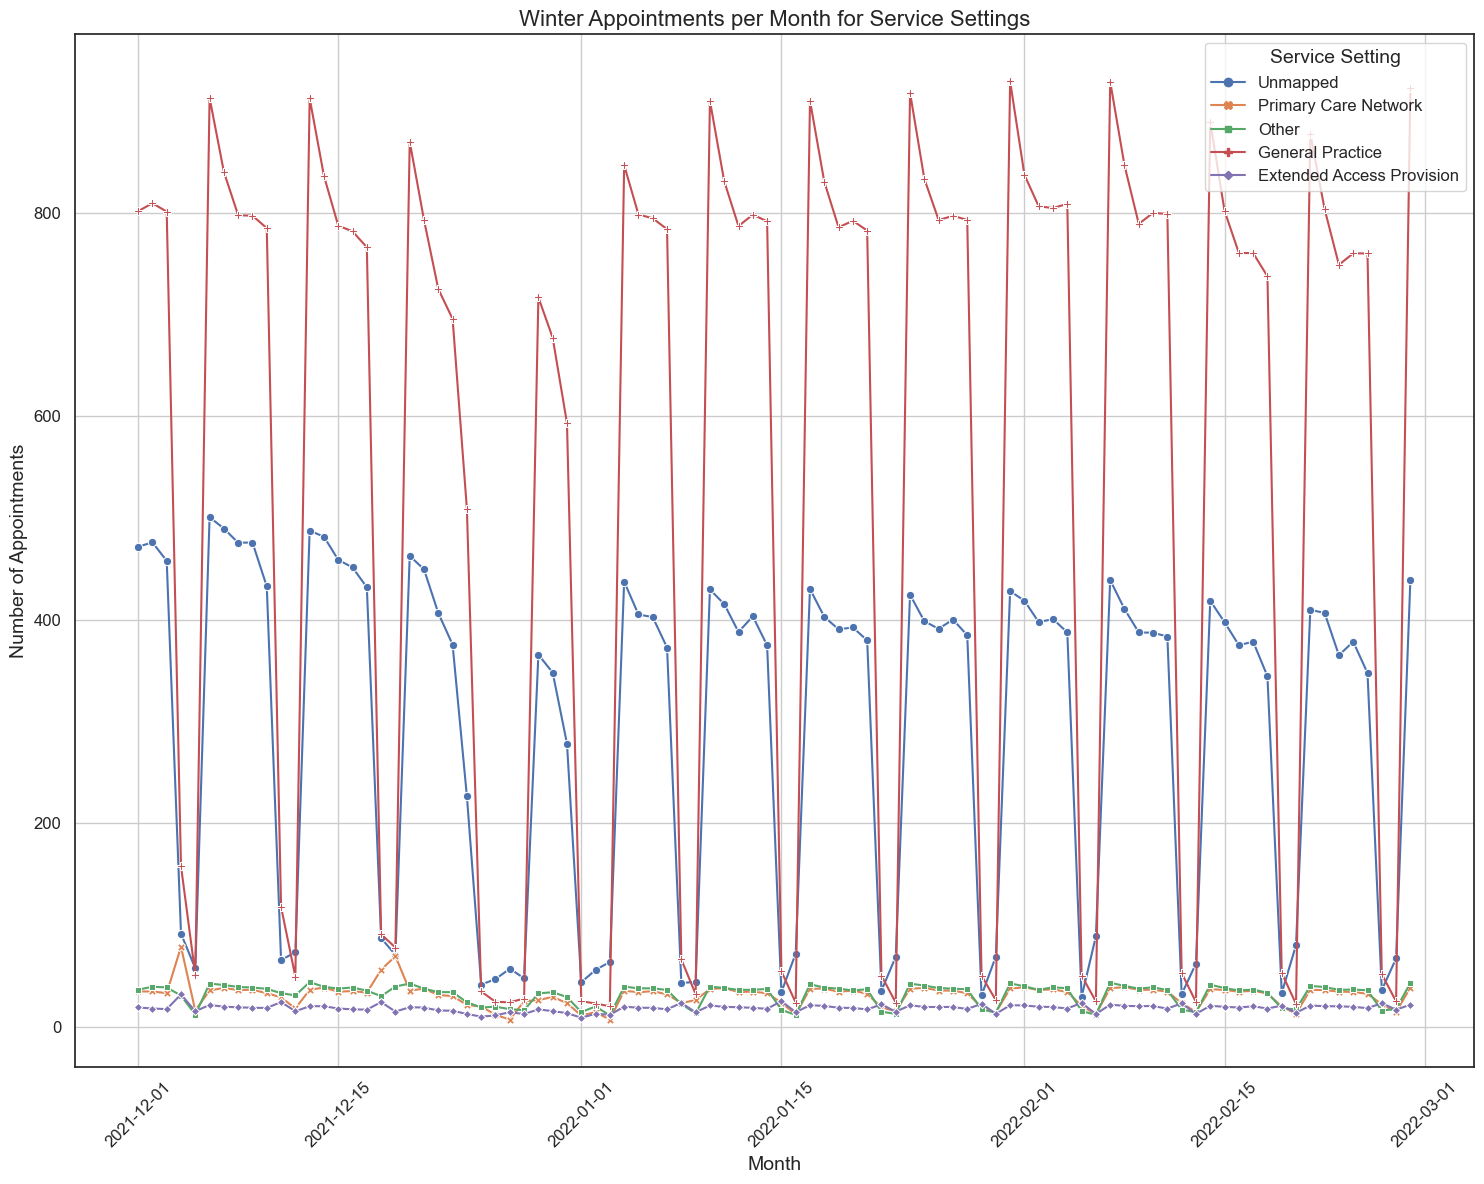

In [282]:
plt.figure(figsize=(15, 12))

# Create the line plot
sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    data=nc_ss_winter, 
    ci=None, 
    marker='o', 
    style='service_setting',
    markers=True,
    dashes=False)

# Set title and labels
plt.title("Winter Appointments per Month for Service Settings", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Appointments", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set y-axis labels font size
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Add a legend title
plt.legend(title='Service Setting', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Spring:**

In [337]:
# Create a separate data set that can be used in future weeks. 

nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])


nc_ss_spring = nc[(nc['appointment_date'] >= '2022-03-01') & 
                  (nc['appointment_date'] <= '2022-05-31')].reset_index()

# View the output.

nc_ss_spring.head()



,index,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month,count_of_appoints
0,4454,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,156,2022-03,82822
1,4455,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Inconsistent Mapping,Inconsistent Mapping,7,2022-03,82822
2,4456,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Structured Medication Review,19,2022-03,82822
3,4457,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Social Prescribing Service,15,2022-03,82822
4,4458,2022-03-01,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Planned Clinics,83,2022-03,82822


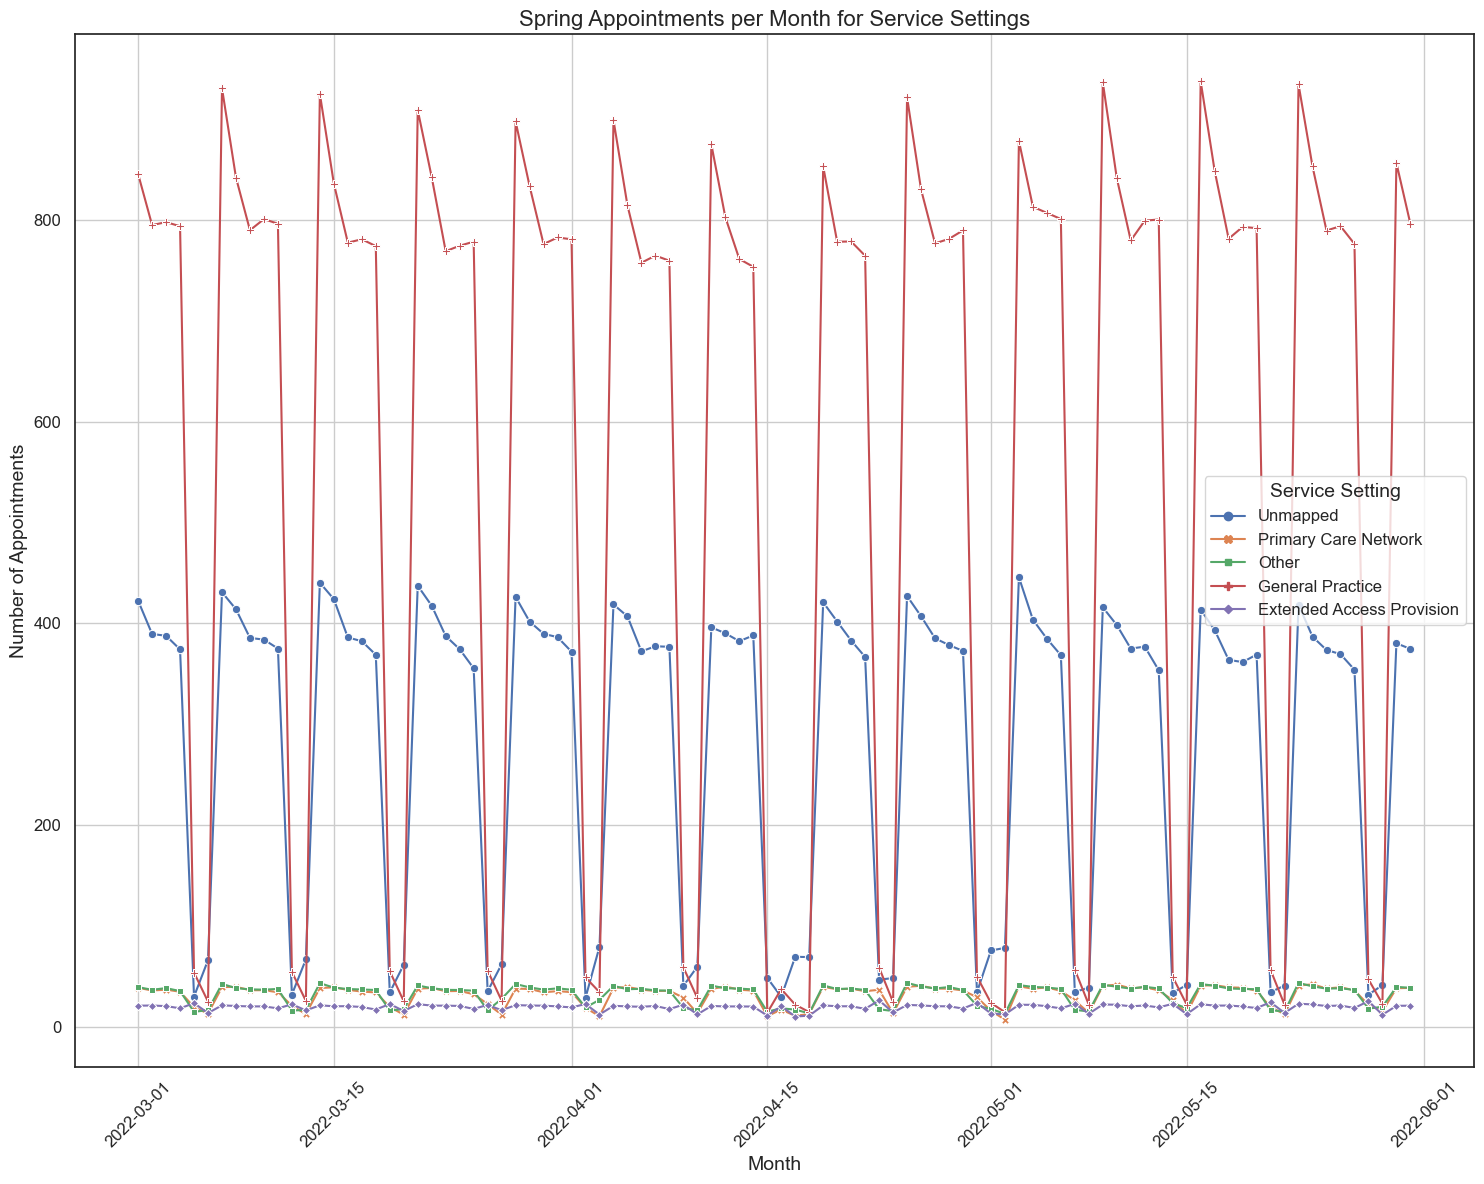

In [284]:
# Visualise the subset using a lineplot.

plt.figure(figsize=(15, 12))

sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    data=nc_ss_spring, 
    ci=None, 
    marker='o', 
    style='service_setting',
    markers=True,
    dashes=False)

# Set title and labels
plt.title("Spring Appointments per Month for Service Settings", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Appointments", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Set y-axis labels font size
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Add a legend title
plt.legend(title='Service Setting', fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [285]:
# Libraries and settings needed for analysis.
import pandas as pd
import seaborn as sns

# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [286]:
# Load the data set.

tweets = pd.read_csv('tweets.csv')

# View the DataFrame.

tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [287]:
# Explore the metadata and data set.

print(tweets.info())
print(tweets.describe())
print(tweets.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None
           tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std

In [288]:
# Would it be useful to only look at retweeted and favourite tweet messages?

print(tweets['tweet_retweet_count'].value_counts())
# Explain your answer.

# We can see that most tweets were not retweeted

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64


In [289]:
print(tweets['tweet_favorite_count'].value_counts())

# Explain your answer.
# We can see that most of the tweets were not favourited

tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


In [343]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text', 'tweet_entities', 'tweet_entities_hashtags']]

# View the DataFrame.

print(tweets_text.head())

# Create a variable (tags) and assign an empty list to it
tags = []


                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members

In [344]:
# Loop through the messages, and create a list of values containing the # symbol.

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# Create pandas series to view values
tweet_hashtags = pd.Series(tags)


In [345]:
# Display the first 30 records.

tweet_hashtags.head(30)

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [346]:
# Convert the series to a DataFrame in preparation for visualisation.

data = tweet_hashtags.value_counts().reset_index()

# Rename the columns.
data.columns = ['word', 'count']

# Fix the count datatype.

data['count'] = (data['count']).astype(int)

# View the result.
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [347]:
# Display records where the count is larger than 10.

data_count = data[data['count'] >10]

# View the DataFrame.
data_count

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [357]:
# 10 first

data_count.head(10)

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


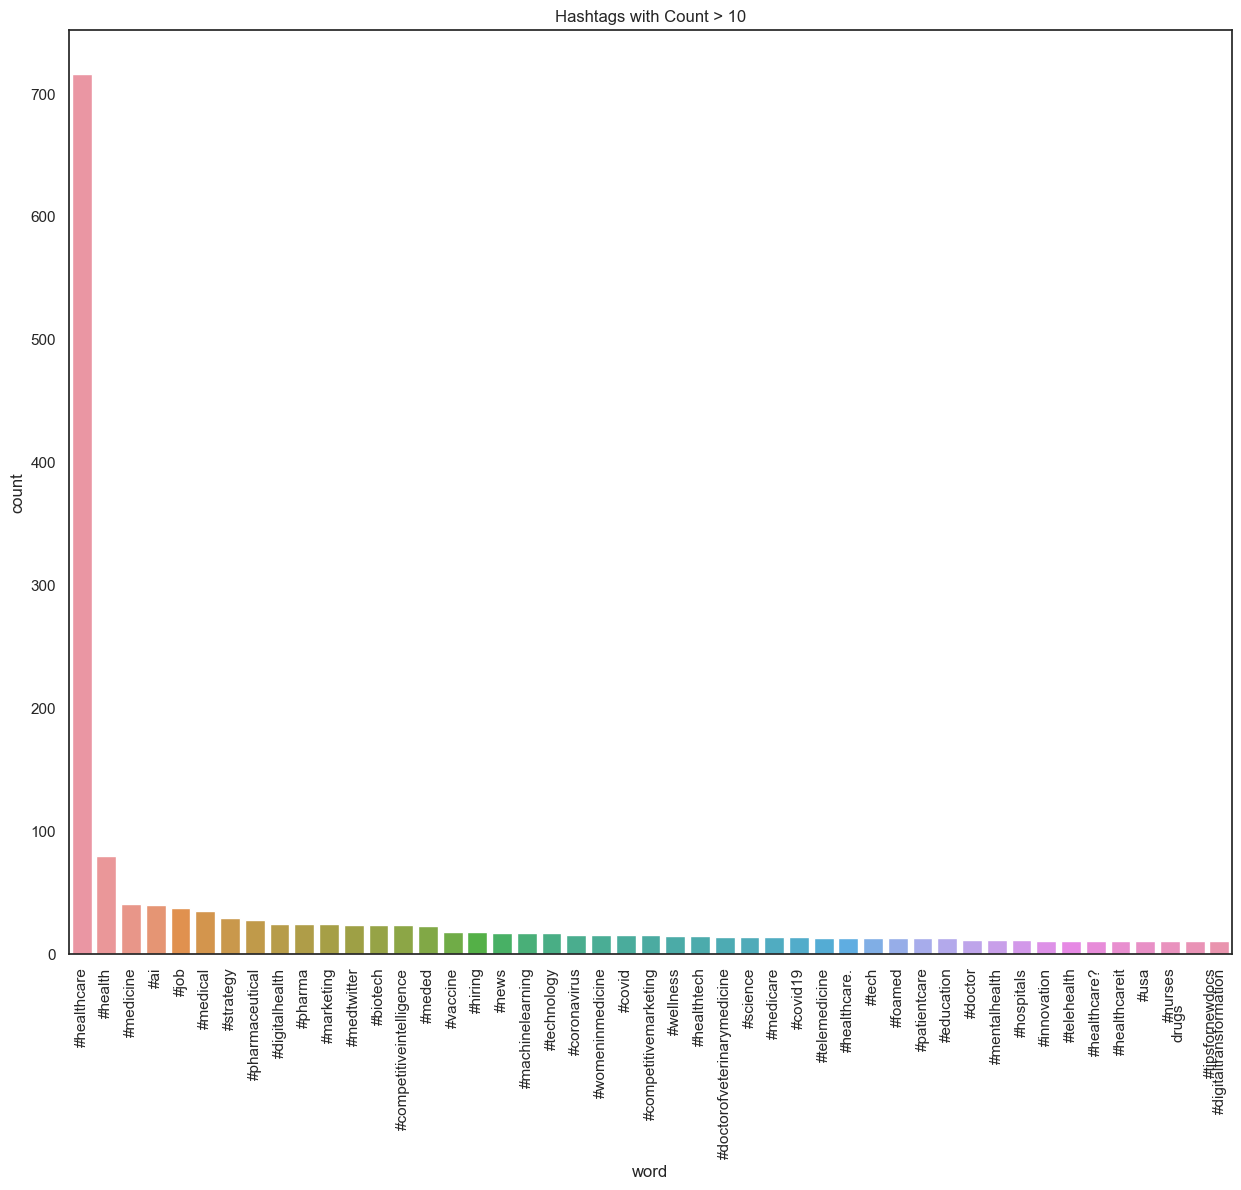

In [348]:
# Create a Seaborn barplot displaying records with a count larger than 10.

filtered_data = data_count[data_count['count'] > 10]

# Create the barplot
plt.figure(figsize=(15, 12))
sns.barplot(data=data_count, x='word', y='count')
plt.xticks(rotation=90)
plt.title('Hashtags with Count > 10')

# Display the plot
plt.show()

In [296]:
# Create the plot.


# View the barplot.


 > ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.

# 

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

In [297]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar_2 = pd.read_csv('appointments_regional.csv')

# View the DataFrame.

ar_2

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


In [298]:
print(ar_2.info())
print(ar_2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
       count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.0000

In [299]:
# Print the min and max dates.

ar_2_min_date = ar_2['appointment_month'].min()
ar_2_max_date = ar_2['appointment_month'].max()

# Use appropriate docstrings.

print("Minimum date:", ar_2_min_date)
print("Maximum date:", ar_2_max_date)

Minimum date: 2020-01
Maximum date: 2022-06


In [349]:
# Filter the data set to only look at data from 2021-08 onwards.

# Convert the 'date' column to datetime format
ar_2['appointment_month'] = pd.to_datetime(ar_2['appointment_month'])

# Filter data from 2021-08 onwards
ar_2_filtered = ar_2[ar_2['appointment_month'] >= '2021-08-01']

# Print the filtered DataFrame
ar_2_filtered

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3652,E54000034,2021-08-01,Attended,GP,Face-to-Face,1 Day,6553
3653,E54000034,2021-08-01,Attended,GP,Face-to-Face,15 to 21 Days,2390
3654,E54000034,2021-08-01,Attended,GP,Face-to-Face,2 to 7 Days,10547
3655,E54000034,2021-08-01,Attended,GP,Face-to-Face,22 to 28 Days,937
3656,E54000034,2021-08-01,Attended,GP,Face-to-Face,8 to 14 Days,4961
...,...,...,...,...,...,...,...
596816,E54000050,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [301]:
# Create an aggregated data set to review the different features.

ar_agg = ar_2[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment',
               'count_of_appointments']]
# View the DataFrame.

print(ar_agg.head())
ar_agg

  appointment_month hcp_type appointment_status appointment_mode  \
0        2020-01-01       GP           Attended     Face-to-Face   
1        2020-01-01       GP           Attended     Face-to-Face   
2        2020-01-01       GP           Attended     Face-to-Face   
3        2020-01-01       GP           Attended     Face-to-Face   
4        2020-01-01       GP           Attended     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971  


,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01-01,GP,Attended,Face-to-Face,1 Day,8107
1,2020-01-01,GP,Attended,Face-to-Face,15 to 21 Days,6791
2,2020-01-01,GP,Attended,Face-to-Face,2 to 7 Days,20686
3,2020-01-01,GP,Attended,Face-to-Face,22 to 28 Days,4268
4,2020-01-01,GP,Attended,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...
596816,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17


In [302]:
print(ar_agg.info())
print(ar_agg.describe())
print(ar_agg.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 6 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   appointment_month                  596821 non-null  datetime64[ns]
 1   hcp_type                           596821 non-null  object        
 2   appointment_status                 596821 non-null  object        
 3   appointment_mode                   596821 non-null  object        
 4   time_between_book_and_appointment  596821 non-null  object        
 5   count_of_appointments              596821 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 27.3+ MB
None
                   appointment_month  count_of_appointments
count                         596821          596821.000000
mean   2021-03-19 11:31:17.489565696            1244.601857
min              2020-01-01 00:00:00               1.000000

In [366]:
# Determine the total number of appointments per month.

sum_appointments = ar_agg.groupby('hcp_type')['count_of_appointments'].count().reset_index()


print(sum_appointments)
# Add a new column to indicate the average utilisation of services.

ar_agg['average_services'] = 'hcp_type'

# Print the DataFrame
ar_agg


               hcp_type  count_of_appointments
0                    GP                 226036
1  Other Practice staff                 241557
2               Unknown                 129228


,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments,average_services
0,2020-01-01,GP,Attended,Face-to-Face,1 Day,8107,hcp_type
1,2020-01-01,GP,Attended,Face-to-Face,15 to 21 Days,6791,hcp_type
2,2020-01-01,GP,Attended,Face-to-Face,2 to 7 Days,20686,hcp_type
3,2020-01-01,GP,Attended,Face-to-Face,22 to 28 Days,4268,hcp_type
4,2020-01-01,GP,Attended,Face-to-Face,8 to 14 Days,11971,hcp_type
...,...,...,...,...,...,...,...
596816,2022-06-01,Unknown,Unknown,Unknown,2 to 7 Days,21,hcp_type
596817,2022-06-01,Unknown,Unknown,Unknown,22 to 28 Days,8,hcp_type
596818,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,28,hcp_type
596819,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,17,hcp_type


In [304]:
# Create a new DataFrame ar_df

ar_df = ar_2[['appointment_month', 'count_of_appointments', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']]

# View the DataFrame.

print(ar_df.head())
ar_df

# determine the total number of appointments per month.

total_number = ar_df.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()

print(total_number)

# Calculate average by dividing the sum of the monthly appointments by 30 to get a daily value. 
ar_df['utilisation'] = ar_df['count_of_appointments'] / 30

# Average of 1,200,000 appointments per day being used for planning purposes
ar_df['utilisation'] = ar_df['utilisation'].apply(lambda x: min(x, 1200000 / 30))

# Round the value to one decimal place.
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame.


print(ar_df)

ar_df



  appointment_month  count_of_appointments appointment_status  \
0        2020-01-01                   8107           Attended   
1        2020-01-01                   6791           Attended   
2        2020-01-01                  20686           Attended   
3        2020-01-01                   4268           Attended   
4        2020-01-01                  11971           Attended   

  appointment_mode time_between_book_and_appointment  
0     Face-to-Face                             1 Day  
1     Face-to-Face                    15  to 21 Days  
2     Face-to-Face                       2 to 7 Days  
3     Face-to-Face                    22  to 28 Days  
4     Face-to-Face                     8  to 14 Days  
   appointment_month  count_of_appointments
0         2020-01-01               27199296
1         2020-02-01               24104621
2         2020-03-01               24053468
3         2020-04-01               16007881
4         2020-05-01               16417212
5         2020-

,appointment_month,count_of_appointments,appointment_status,appointment_mode,time_between_book_and_appointment,utilisation
0,2020-01-01,8107,Attended,Face-to-Face,1 Day,270.2
1,2020-01-01,6791,Attended,Face-to-Face,15 to 21 Days,226.4
2,2020-01-01,20686,Attended,Face-to-Face,2 to 7 Days,689.5
3,2020-01-01,4268,Attended,Face-to-Face,22 to 28 Days,142.3
4,2020-01-01,11971,Attended,Face-to-Face,8 to 14 Days,399.0
...,...,...,...,...,...,...
596816,2022-06-01,21,Unknown,Unknown,2 to 7 Days,0.7
596817,2022-06-01,8,Unknown,Unknown,22 to 28 Days,0.3
596818,2022-06-01,28,Unknown,Unknown,8 to 14 Days,0.9
596819,2022-06-01,17,Unknown,Unknown,More than 28 Days,0.6


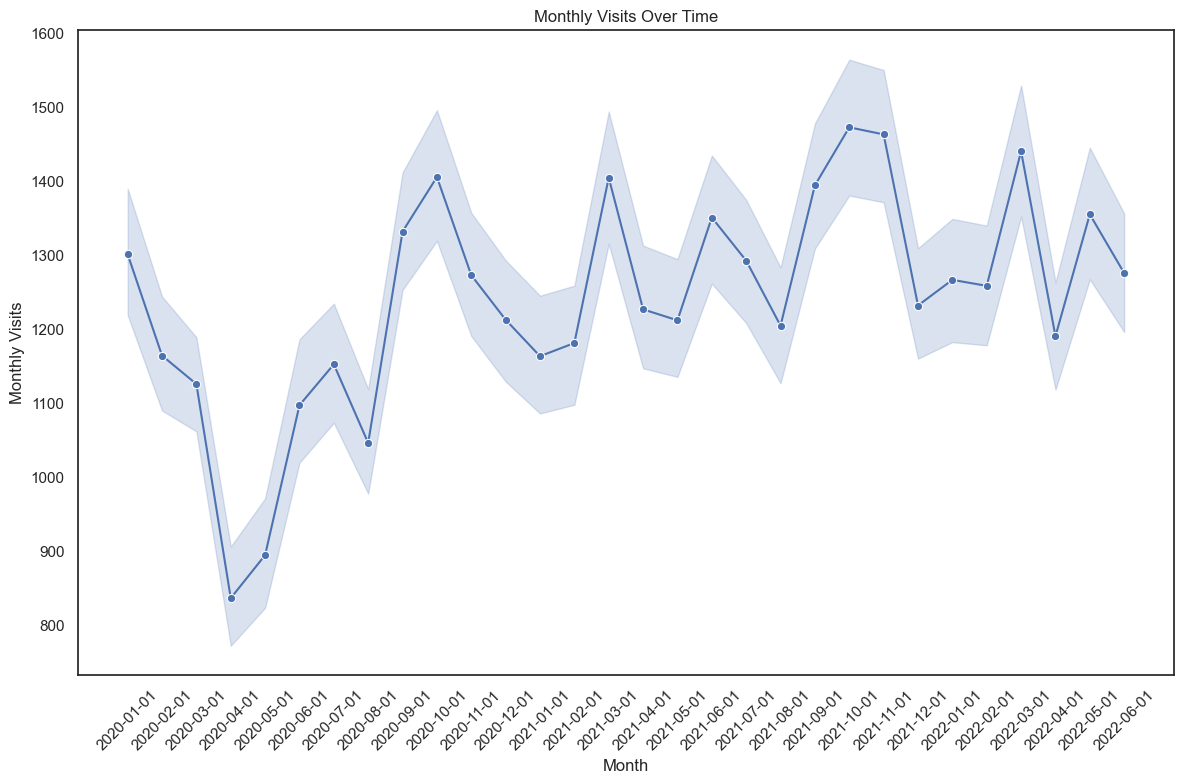

In [305]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.

ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)


# Create a lineplot with Seaborn.

plt.figure(figsize=(12, 8))
sns.lineplot(data=ar_df, x='appointment_month', y='count_of_appointments', marker='o')
plt.xlabel('Month')
plt.ylabel('Monthly Visits')
plt.title('Monthly Visits Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

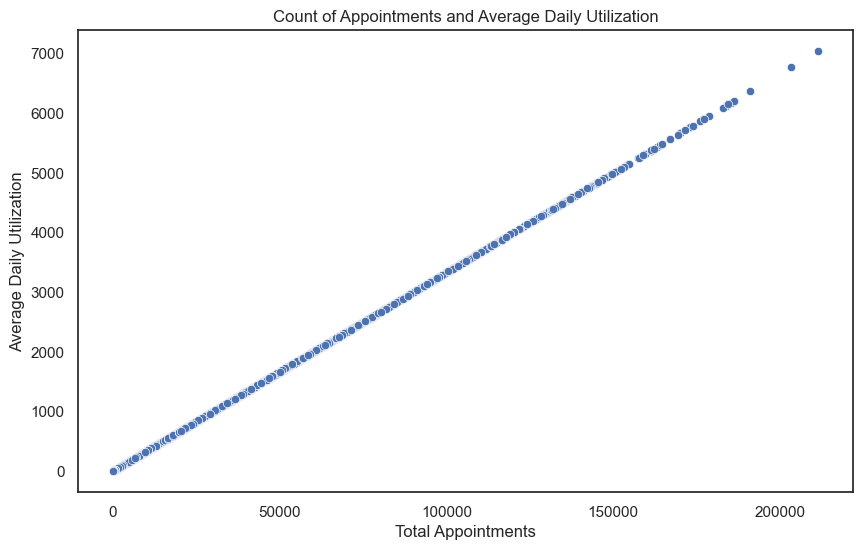

In [382]:
# Plot monthly capacity utilisation.

# Create the scatter plot   
plt.figure(figsize=(10, 6))  
sns.scatterplot(x='count_of_appointments', y='utilisation', data=ar_df)

# Add title and labels
plt.title('Count of Appointments and Average Daily Utilization')
plt.xlabel('Total Appointments')
plt.ylabel('Average Daily Utilization')

# Show the plot
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

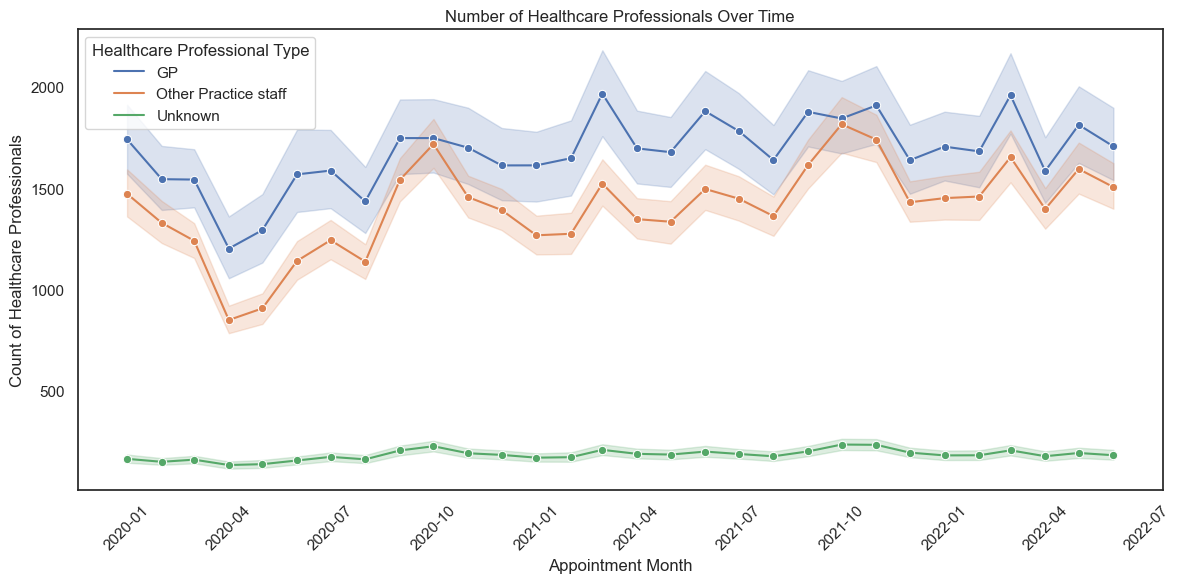

In [307]:
# Create a lineplot to answer the question.
hcp_counts = ar_2.groupby(['appointment_month', 'hcp_type']).size().reset_index(name='count')

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=ar_2, x='appointment_month', y='count_of_appointments', hue='hcp_type', marker='o')

# Customize the plot
plt.title('Number of Healthcare Professionals Over Time')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Healthcare Professionals')
plt.xticks(rotation=45)
plt.legend(title='Healthcare Professional Type')

# Show the plot
plt.tight_layout()
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

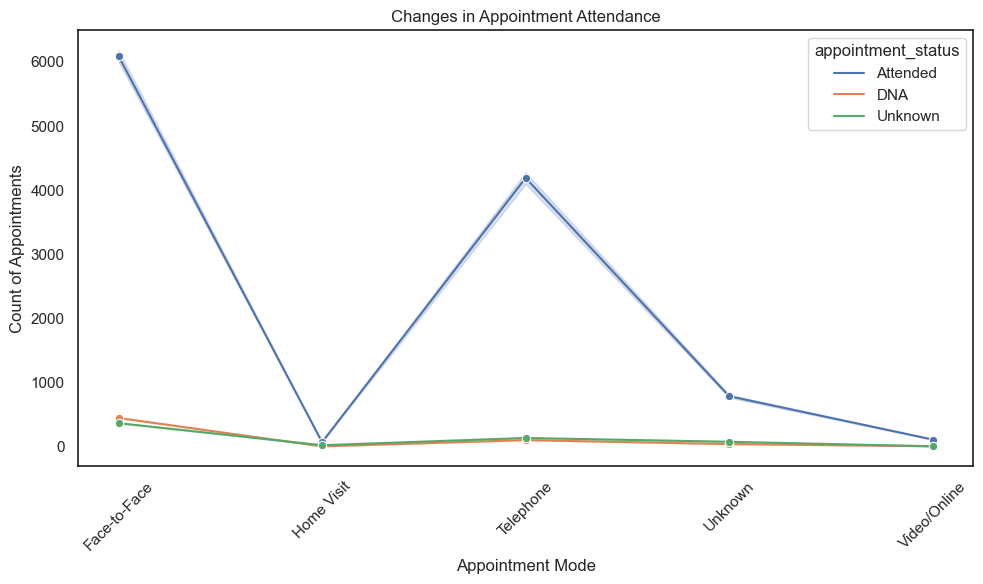

In [308]:
# Create a lineplot to answer the question.

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_2, x='appointment_mode', y='count_of_appointments', hue='appointment_status', marker='o')

# Adding labels and title
plt.title('Changes in Appointment Attendance')
plt.xlabel('Appointment Mode')
plt.ylabel('Count of Appointments')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

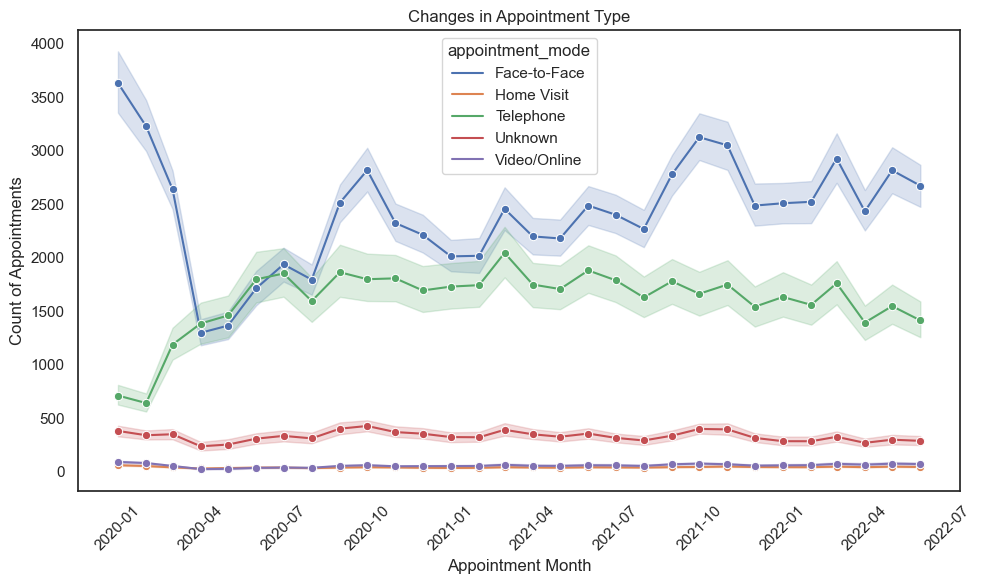

In [309]:
# Create a lineplot to answer the question.

plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_2, x='appointment_month', y='count_of_appointments', hue='appointment_mode', marker='o')

# Adding labels and title
plt.title('Changes in Appointment Type')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

**Question 5:** Are there any trends in time between booking an appointment?

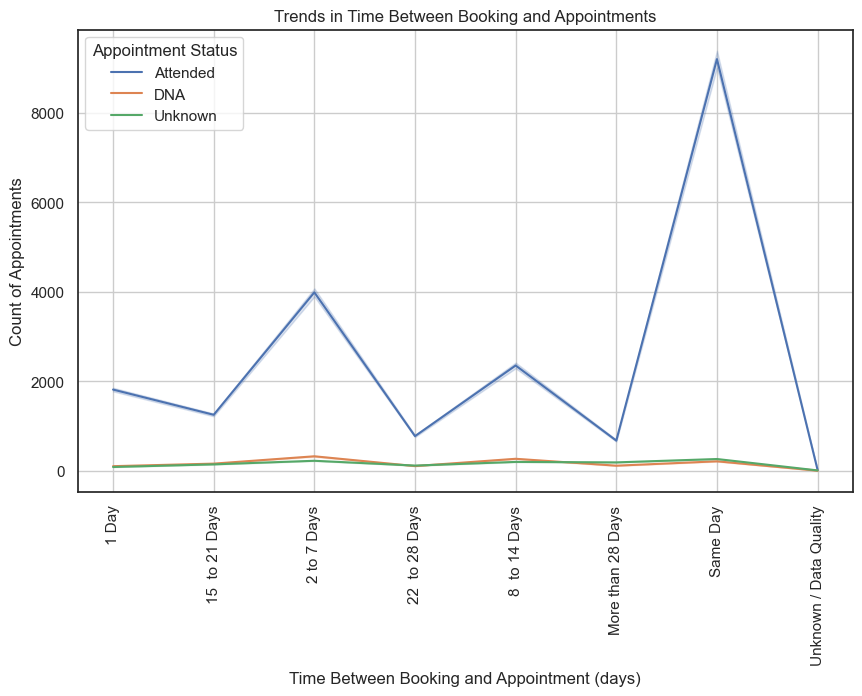

In [310]:
# Create a lineplot to answer the question.

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_2, x='time_between_book_and_appointment', y='count_of_appointments', hue='appointment_status')

# Add labels and title
plt.xlabel('Time Between Booking and Appointment (days)')
plt.ylabel('Count of Appointments')
plt.title('Trends in Time Between Booking and Appointments')
plt.legend(title='Appointment Status')
plt.grid(True)

plt.xticks(rotation=90)

# Show plot
plt.show()

**Question 6:** How does the spread of service settings compare?

In [311]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
print(nc.head())

  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2             

In [312]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

nc_df = nc[['appointment_month', 'count_of_appointments', 'service_setting']]
# View the DataFrame.
nc_df

,appointment_month,count_of_appointments,service_setting
0,2021-08,3,Primary Care Network
1,2021-08,7,Other
2,2021-08,79,General Practice
3,2021-08,725,General Practice
4,2021-08,2,General Practice
...,...,...,...
817389,2022-06,12,Extended Access Provision
817390,2022-06,4,Extended Access Provision
817391,2022-06,92,Extended Access Provision
817392,2022-06,4,Extended Access Provision


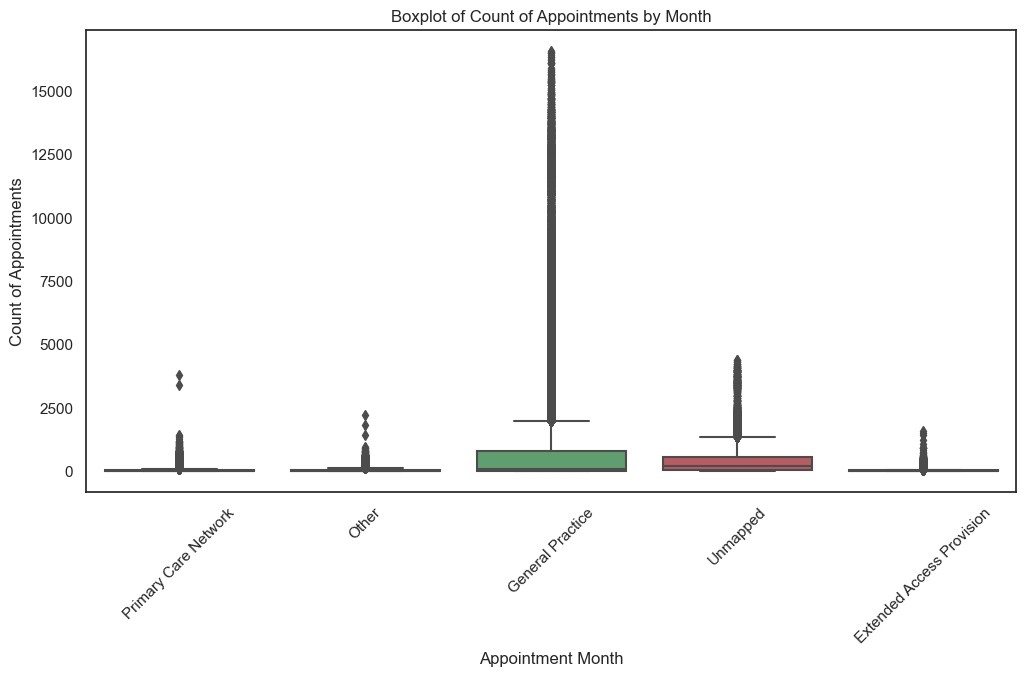

In [313]:
# Create a boxplot to investigate the spread of service settings.

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Count of Appointments by Month')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.show()

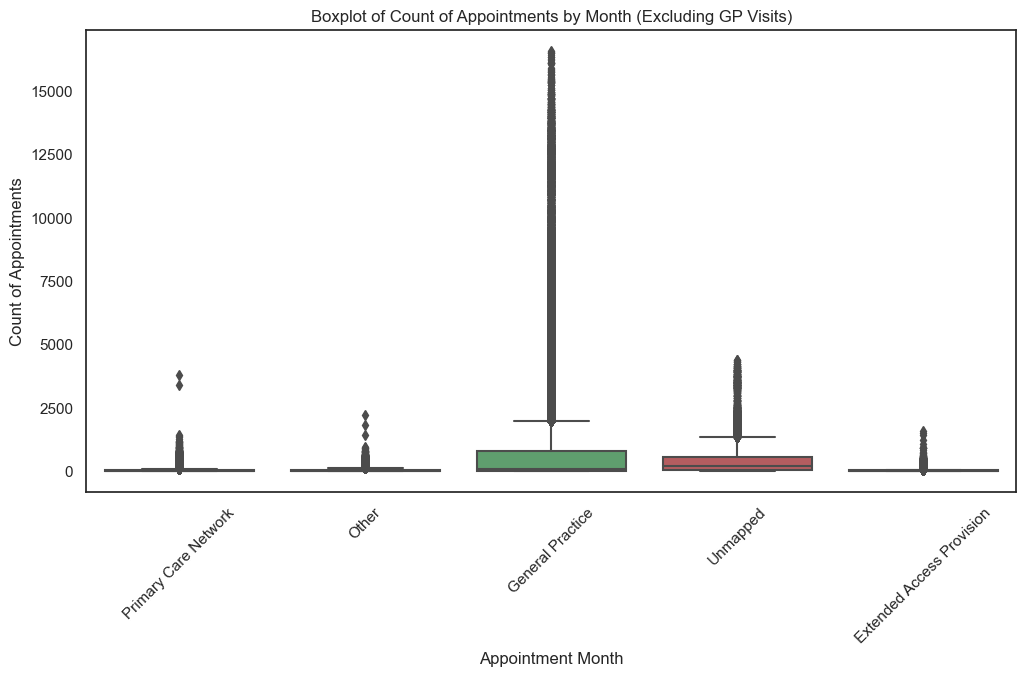

In [314]:
# Create a boxplot to investigate the service settings without GP.
filtered_df = nc_df[nc_df['service_setting'] != 'GP']

# Create a boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_df)
plt.xticks(rotation=45)
plt.title('Boxplot of Count of Appointments by Month (Excluding GP Visits)')
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments')
plt.show()


In [ ]:
# Pivot tables

In [367]:
# Pivot to understand service settings per month
nc_table = nc.pivot_table(
    values='count_of_appointments',
    index='service_setting',
    columns='appointment_month')

nc_table.head()

appointment_month,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
service_setting,,,,,,,,,,,
Extended Access Provision,17.835199,19.357783,21.707138,20.390668,18.364098,19.536164,20.162736,20.813588,20.554142,21.288955,21.040947
General Practice,687.545075,774.884876,828.342515,810.788630,714.182512,745.214340,746.410902,758.258764,715.183260,756.122712,742.913694
Other,36.530096,40.248435,43.714611,41.659882,37.082509,37.839358,37.858163,38.134306,38.048191,39.066051,38.965902
Primary Care Network,29.272863,33.230080,36.080273,35.799767,33.897518,35.093679,35.626027,36.431255,37.331897,38.734026,39.421506
Unmapped,488.070807,499.295590,504.487265,473.970577,375.839701,348.945137,350.430238,357.841366,334.056678,339.863354,334.349934


In [368]:
nc_2_table = nc.pivot_table(
    values='count_of_appointments',
    index='national_category',
    columns='service_setting')

nc_2_table.head()

service_setting,Extended Access Provision,General Practice,Other,Primary Care Network,Unmapped
national_category,,,,,
Care Home Needs Assessment & Personalised Care and Support Planning,6.552693,21.721166,6.173821,10.978114,NaN
Care Home Visit,10.943495,29.045432,10.304484,11.605129,NaN
Clinical Triage,23.791462,1417.781942,35.650797,24.585655,NaN
General Consultation Acute,22.466333,1810.969492,30.851827,33.823100,NaN
General Consultation Routine,24.414801,3009.233561,77.166088,88.632494,NaN


In [369]:
nc_3_table = nc.pivot_table(
    values='count_of_appointments',
    index='national_category',
    columns='appointment_month')

nc_3_table.head()

appointment_month,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
national_category,,,,,,,,,,,
Care Home Needs Assessment & Personalised Care and Support Planning,14.734856,15.166591,15.159346,16.808225,16.620144,17.868297,17.919596,18.354866,18.414405,19.528448,19.356112
Care Home Visit,21.395234,22.881146,23.042900,24.337008,23.552239,24.223764,23.447424,23.734761,23.559211,24.791890,24.041406
Clinical Triage,576.709793,608.938794,588.597863,602.247987,546.958919,573.650266,549.942995,546.246845,510.797617,520.945555,506.446087
General Consultation Acute,576.710225,616.634311,632.038236,663.330058,620.041386,638.267298,635.559184,648.183022,626.578926,654.946687,640.781496
General Consultation Routine,987.779547,1096.748941,1130.945388,1173.911405,1016.000250,1084.899360,1098.027817,1131.048501,1037.537554,1115.430589,1091.471054


In [370]:
# Pivot table to understand better the ar dataframe
ar_table = ar.pivot_table(
    values='count_of_appointments',
    index='appointment_status',
    columns='time_between_book_and_appointment')

ar_table.head()

time_between_book_and_appointment,1 Day,15 to 21 Days,2 to 7 Days,22 to 28 Days,8 to 14 Days,More than 28 Days,Same Day,Unknown / Data Quality
appointment_status,,,,,,,,
Attended,1816.822520,1253.155479,3990.724788,776.403950,2355.387472,676.395601,9205.290191,18.298396
DNA,104.603192,161.497122,325.321713,106.848488,269.581614,115.441320,213.194928,4.231427
Unknown,86.053649,144.927396,225.120156,117.778915,199.728585,189.101753,264.456567,9.673008


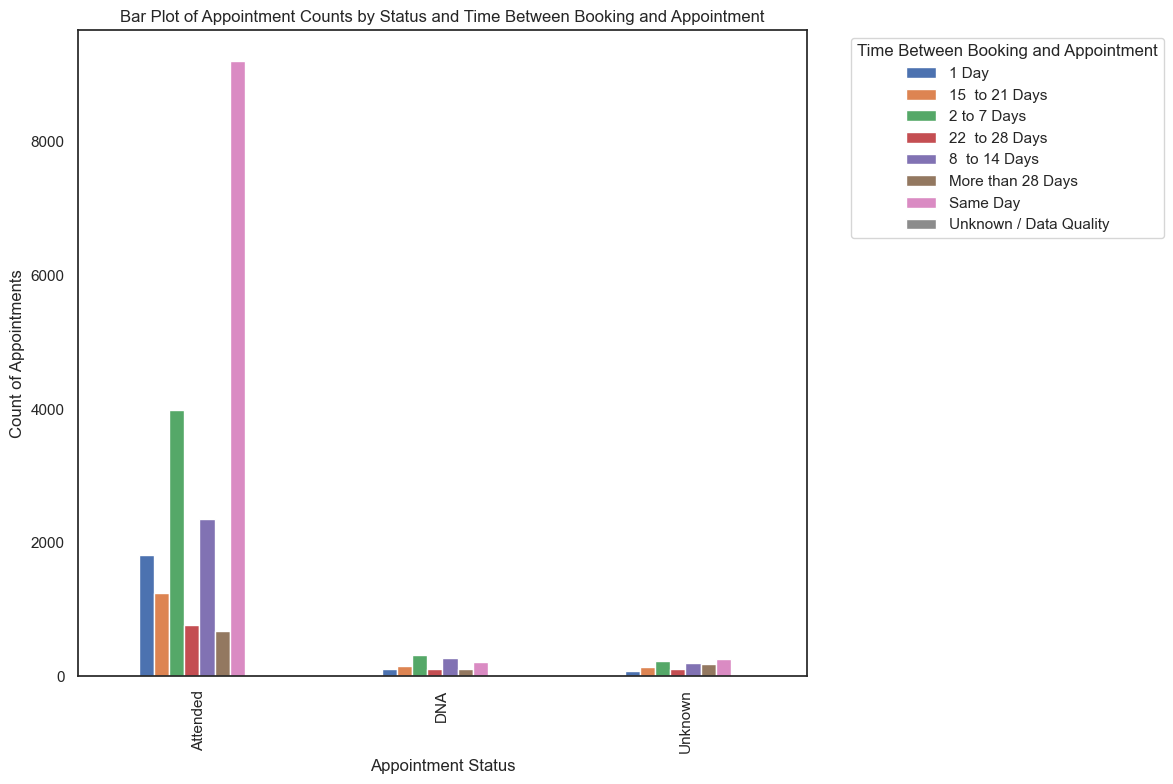

In [371]:
# Create the bar plot
ar_table.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.title('Bar Plot of Appointment Counts by Status and Time Between Booking and Appointment')
plt.xlabel('Appointment Status')
plt.ylabel('Count of Appointments')
plt.legend(title='Time Between Booking and Appointment', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the bar plot
plt.tight_layout()
plt.show()

In [ ]:
# 
ar_2_table = ar.pivot_table(
    values='count_of_appointments',
    index='hcp_type',
    columns='appointment_mode')

ar_2_table.head()

In [373]:
ar_3_table = ar_df.pivot_table(
    values='utilisation',
    index='appointment_month')

ar_3_table.head()

,utilisation
appointment_month,
2020-01-01,43.401159
2020-02-01,38.834753
2020-03-01,37.552867
2020-04-01,27.899916
2020-05-01,29.839966


In [380]:
# Calculate the total of staff 
hcp_counts = ar['hcp_type'].value_counts()

hcp_counts

hcp_type
Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: count, dtype: int64

In [385]:
# NHS staff table

staff_table = med.pivot_table(
    index='Specialty Group',   
    columns='NHSE_Region_Name',  
    values='Total FTE',        
    aggfunc='sum',             
    fill_value=0               
)

# Display the pivot table
print(staff_table)
staff_table

NHSE_Region_Name          East of England      London    Midlands  \
Specialty Group                                                     
Anaesthetics                   1442.61248  3523.11442  2574.31524   
Clinical oncology               164.88705   237.55375   279.09437   
Dental group                    175.08235   669.60715   432.22343   
Emergency Medicine              910.50919  1656.37560  1389.55577   
General medicine group         3326.34189  7079.13856  5685.27931   
Obstetrics & gynaecology        677.67498  1459.53834  1143.94916   
PHM & CHS group                  58.96000   110.11022    87.63513   
Paediatric group                890.69782  2229.84717  1569.56616   
Pathology group                 430.75760  1107.74799   763.92230   
Psychiatry group                850.34180  2418.83486  1665.12657   
Radiology group                 460.24165  1141.19956   806.79686   
Surgical group                 2651.19487  4771.33932  4487.51439   

NHSE_Region_Name          North E

NHSE_Region_Name,East of England,London,Midlands,North East and Yorkshire,North West,South East,South West
Specialty Group,,,,,,,
Anaesthetics,1442.61248,3523.11442,2574.31524,2210.90640,2143.67837,2112.98659,1502.34533
Clinical oncology,164.88705,237.55375,279.09437,162.63306,145.15600,262.07313,185.18875
Dental group,175.08235,669.60715,432.22343,529.66048,319.18074,277.12808,277.19325
Emergency Medicine,910.50919,1656.37560,1389.55577,1334.71189,1218.93221,1244.62716,737.71538
General medicine group,3326.34189,7079.13856,5685.27931,5262.85485,4385.01075,4464.86400,3355.15307
Obstetrics & gynaecology,677.67498,1459.53834,1143.94916,944.82635,901.79577,920.73090,539.00709
PHM & CHS group,58.96000,110.11022,87.63513,93.23263,191.53918,148.54200,43.52988
Paediatric group,890.69782,2229.84717,1569.56616,1390.42148,1239.01692,1330.70375,687.17800
Pathology group,430.75760,1107.74799,763.92230,702.95637,557.08650,596.69257,414.37799


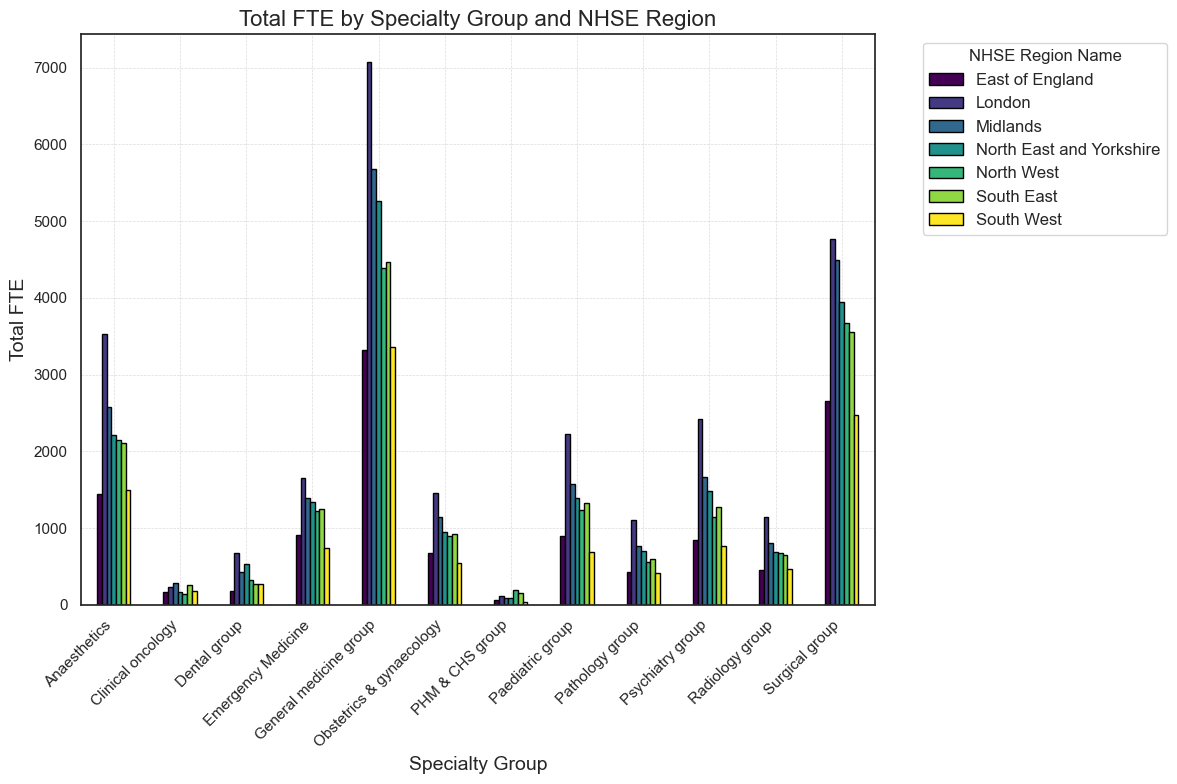

In [386]:
# Visualisation of the table
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the pivot table with a bar chart
staff_table.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')

# Enhance the aesthetics
ax.set_title('Total FTE by Specialty Group and NHSE Region', fontsize=16)
ax.set_xlabel('Specialty Group', fontsize=14)
ax.set_ylabel('Total FTE', fontsize=14)
ax.legend(title='NHSE Region Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

In [389]:
top_specialties_by_region = med.groupby('NHSE_Region_Name').apply(lambda x: x.nlargest(10, 'Total FTE')).reset_index(drop=True)


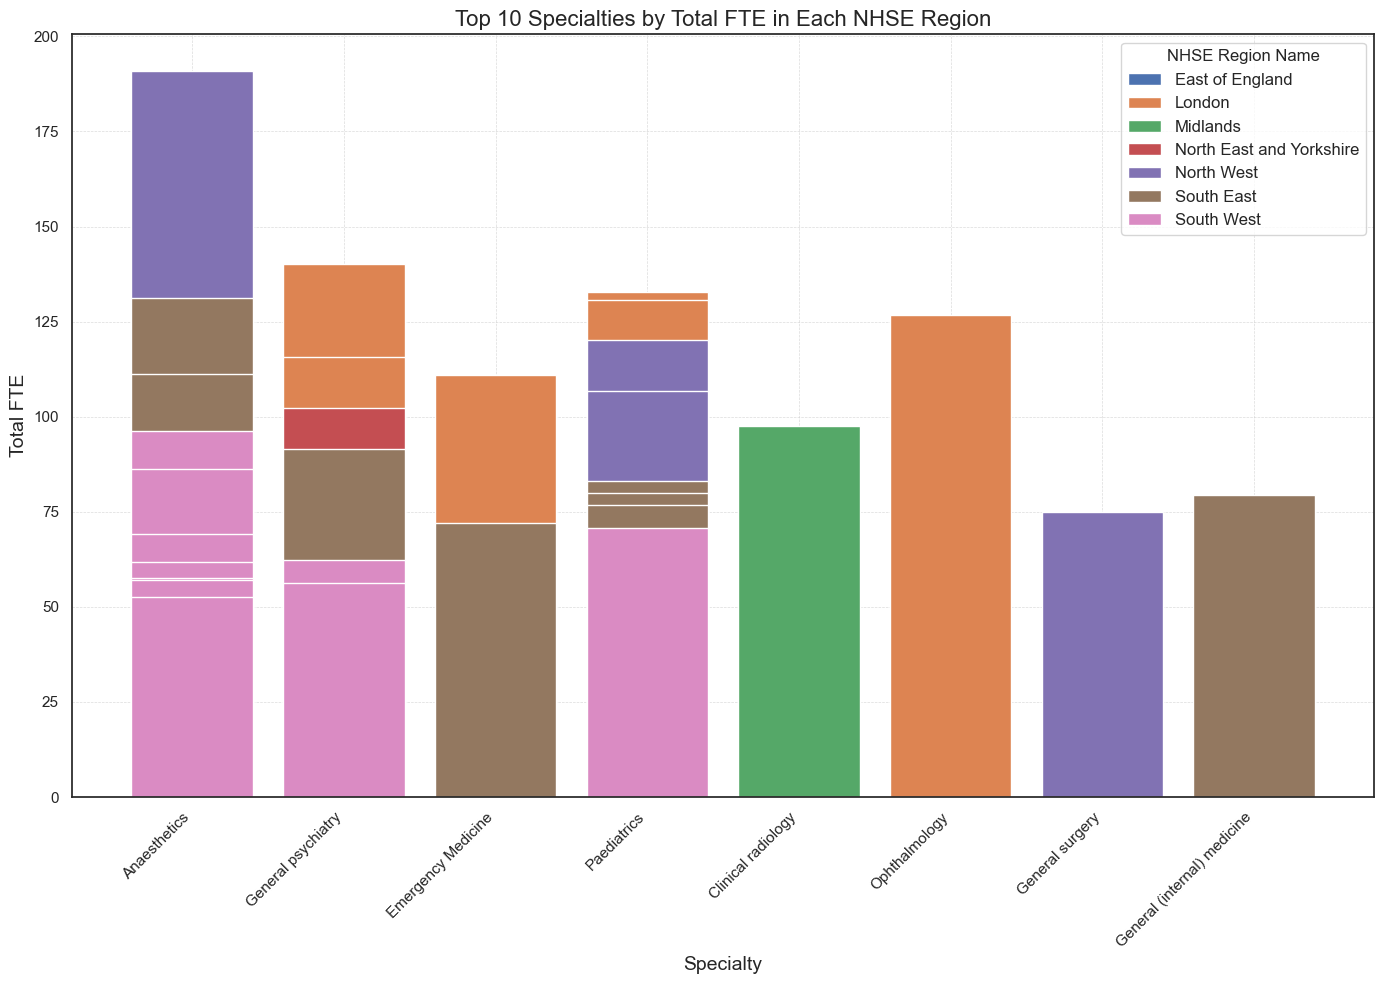

In [390]:
# Top ten specialities of Each Region

fig, ax = plt.subplots(figsize=(14, 10))

# Plot each region's top 10 specialties
for region in top_specialties_by_region['NHSE_Region_Name'].unique():
    region_data = top_specialties_by_region[top_specialties_by_region['NHSE_Region_Name'] == region]
    ax.bar(region_data['Specialty'], region_data['Total FTE'], label=region)

# Enhance the aesthetics
ax.set_title('Top 10 Specialties by Total FTE in Each NHSE Region', fontsize=16)
ax.set_xlabel('Specialty', fontsize=14)
ax.set_ylabel('Total FTE', fontsize=14)
ax.legend(title='NHSE Region Name', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()

### Provide a summary of your findings and recommendations based on the analysis.

> Double-click to insert your summary.

> ***Check*** that you have adequately satisfied the expectations of the current module and that you have added code comments as well as Markdown cells documenting your analytic journey and observations to satisfy the assessment criteria.